# K-Means

In [1]:
from sklearn.datasets import make_blobs
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

Text(0.5, 1.0, 'Synthetic Dataset for K-Means Clustering')

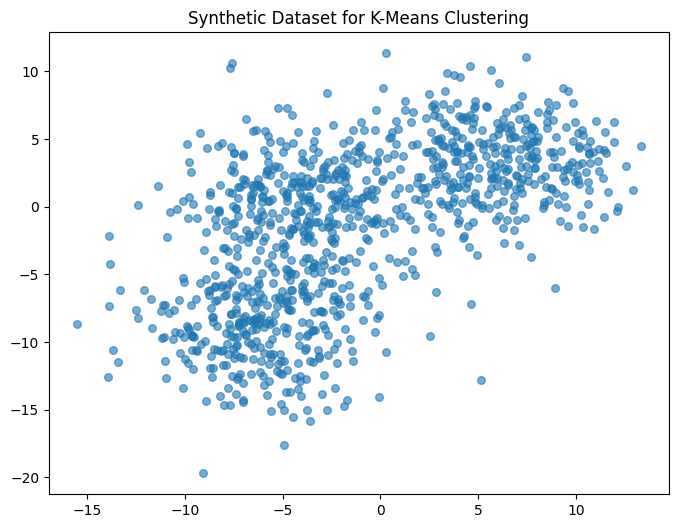

In [2]:
data = make_blobs(n_samples=1000, centers=3, cluster_std=3, random_state=17)
X, _ = data

plt.figure(figsize=(8, 6))
plt.scatter(X[:, 0], X[:, 1], s=30, alpha=0.6)
plt.title('Synthetic Dataset for K-Means Clustering')

## 1. K-Means from scratch

### Step 1: Initialize random centroids

In [3]:
K = 3
rng = np.random.default_rng(seed=17)
centroid_ids = rng.integers(low=0, high=len(X), size=K)
centroids = np.array([X[id] for id in centroid_ids])
print(centroids)

[[ -4.39229125 -12.65547957]
 [ -5.49808647 -10.87281447]
 [ -5.5578956   -3.57625761]]


In [4]:
print(X.shape, centroids.shape)

(1000, 2) (3, 2)


Text(0.5, 1.0, 'First centroids')

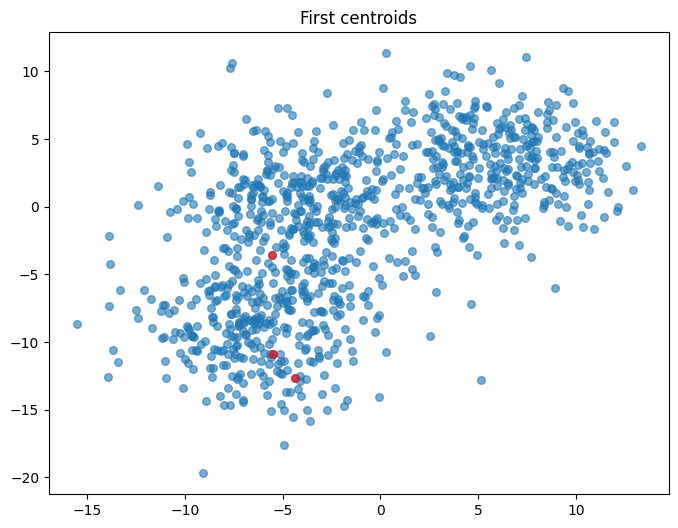

In [5]:
plt.figure(figsize=(8, 6))
plt.scatter(X[:, 0], X[:, 1], s=30, alpha=0.6)
plt.scatter(centroids[:, 0], centroids[:, 1], s=30, alpha=0.6, color="r")
plt.title('First centroids')

### Step 2: Compute distance matrix

In [6]:
a_squared = np.sum(X**2, axis=1)
b_squared = np.sum(centroids**2, axis=1)
a_b = X @ centroids.T

squared_distances = a_squared.reshape(-1, 1) + b_squared.reshape(1, -1) - 2 * a_b

In [7]:
print(squared_distances.shape)

(1000, 3)


### Step 3: Assign to clusters

In [8]:
clusters = pd.DataFrame({"cluster": np.argmin(squared_distances, axis=1), "point": list(X)})
clusters

,cluster,point
0,2,"[-7.674805290995771, 10.255886284396782]"
1,2,"[3.996752099666394, -0.9688102571933186]"
2,2,"[-1.6064493638419695, -3.815774615971672]"
3,2,"[-1.7078582668889242, 3.8654579592068683]"
4,2,"[-4.522568136718611, -6.883877681367248]"
...,...,...
995,2,"[-5.982770915039299, -2.5611628385306195]"
996,2,"[-4.363295689992694, -5.002164920657768]"
997,2,"[-2.4300426984107824, 6.068363169221433]"
998,2,"[-4.0681905120793305, 2.23566838453449]"


### Step 4: Update centroids

In [9]:
centroids = np.vstack(clusters.groupby('cluster')['point'].mean())
centroids

array([[ -3.77157678, -12.98870379],
       [ -7.03637798,  -9.56746497],
       [  0.0867479 ,   0.93338759]])

Text(0.5, 1.0, 'Updated centroids')

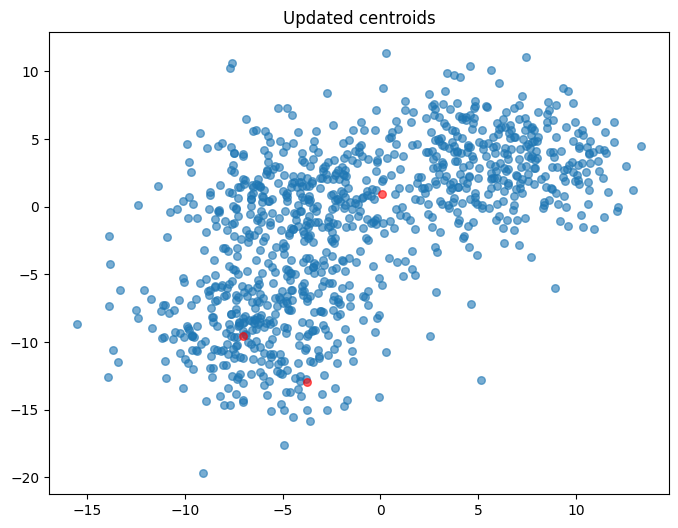

In [10]:
plt.figure(figsize=(8, 6))
plt.scatter(X[:, 0], X[:, 1], s=30, alpha=0.6)
plt.scatter(centroids[:, 0], centroids[:, 1], s=30, alpha=0.6, color="r")
plt.title('Updated centroids')

### Step 5: Repeat n_iterations

In [11]:
class MyKMeans:
    def __init__(self, K, n_iterations=10, random_state=17):
        self.K = K
        self.n_iterations = n_iterations
        self.random_state = random_state
        self.centroids = np.zeros(shape=(K,2))
        self.clusters = None

    def compute_distance_matrix(self, X):
        a_squared = np.sum(X**2, axis=1)
        b_squared = np.sum(self.centroids**2, axis=1)
        a_b = X @ self.centroids.T

        return a_squared.reshape(-1, 1) + b_squared.reshape(1, -1) - 2 * a_b

    def fit(self, X):
        rng = np.random.default_rng(seed=self.random_state)

        centroid_ids = rng.integers(low=0, high=len(X), size=self.K)
        self.centroids = np.array([X[id] for id in centroid_ids])

        for _ in range(self.n_iterations):
            distances = self.compute_distance_matrix(X)
            self.clusters = pd.DataFrame({"cluster": np.argmin(distances, axis=1), "point": list(X)})
            self.centroids = np.vstack(self.clusters.groupby('cluster')['point'].mean())

        self.clusters = pd.DataFrame({"cluster": np.argmin(distances, axis=1), "point": list(X)})

Text(0.5, 1.0, 'Final centroids after 10 iterations')

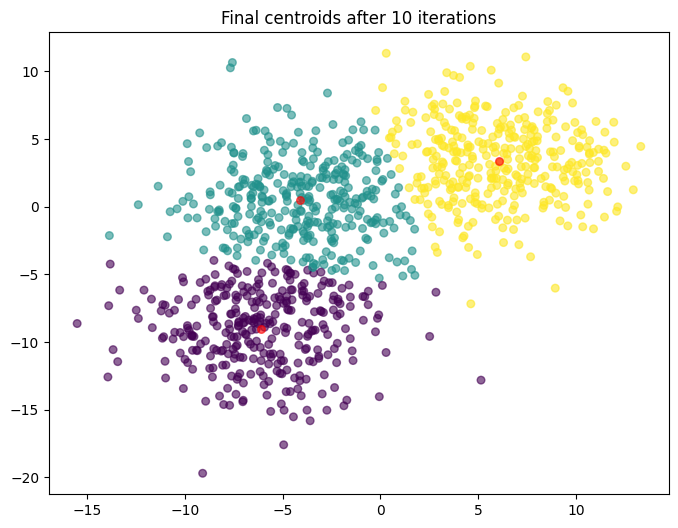

In [12]:
kmeans = MyKMeans(3)
kmeans.fit(X)

plt.figure(figsize=(8, 6))
plt.scatter(X[:, 0], X[:, 1], s=30, c=kmeans.clusters['cluster'], alpha=0.6)
plt.scatter(kmeans.centroids[:, 0], kmeans.centroids[:, 1], s=30, alpha=0.6, color="r")
plt.title('Final centroids after 10 iterations')

## 2. K-Means from sklearn

Text(0.5, 1.0, 'sklearn K-Means')

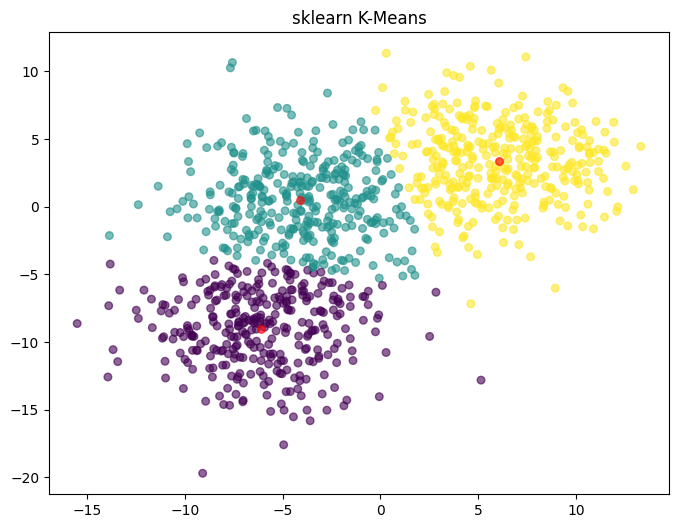

In [13]:
from sklearn.cluster import KMeans

sk_kmeans = KMeans(n_clusters=3, max_iter=10, random_state=17)
sk_kmeans.fit(X)
sk_labels = sk_kmeans.labels_
sk_centroids = sk_kmeans.cluster_centers_

plt.figure(figsize=(8, 6))
plt.scatter(X[:, 0], X[:, 1], s=30, c=sk_labels, alpha=0.6)
plt.scatter(sk_centroids[:, 0], sk_centroids[:, 1], s=30, alpha=0.6, color="r")
plt.title('sklearn K-Means')

## 3. Which K is best?

In [15]:
def sse(max_k, X):
    sse_values = []
    ks_to_check = range(2, max_k + 1)
    for i in ks_to_check:
        kmeans = MyKMeans(i)
        kmeans.fit(X)
        points = np.vstack(kmeans.clusters['point'].values)
        assigned_centroids = kmeans.centroids[kmeans.clusters['cluster'].values]
        sse = np.sum((points - assigned_centroids) ** 2)

        sse_values.append(sse)

    plt.figure(figsize=(8, 6))
    plt.plot(ks_to_check, sse_values, marker='o')
    plt.title('Elbow method')
    plt.xlabel('K')
    plt.ylabel('SSE')
    plt.grid(True, alpha=0.3)
    plt.show()

    return sse_values

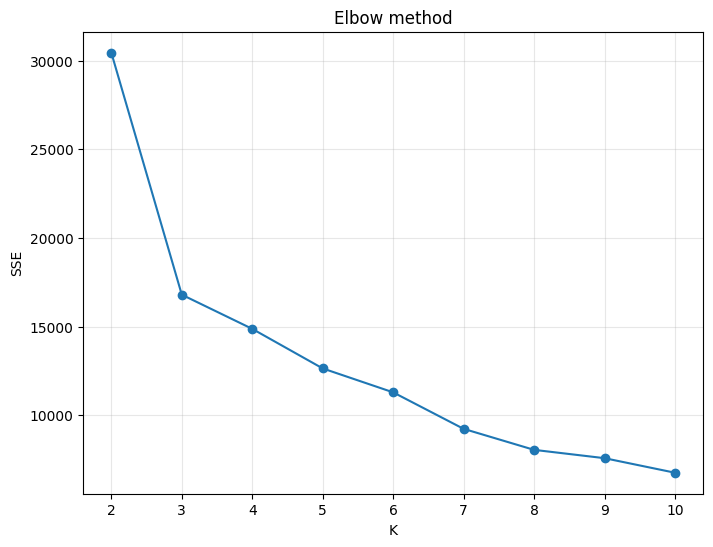

[np.float64(30448.8671127016),
 np.float64(16804.183812138057),
 np.float64(14877.386316543783),
 np.float64(12646.837817921045),
 np.float64(11297.833280631026),
 np.float64(9239.565794375074),
 np.float64(8054.931751203718),
 np.float64(7585.785823833754),
 np.float64(6765.468652322021)]

In [16]:
sse(10, X)

## Check sklearn SSE for comparison

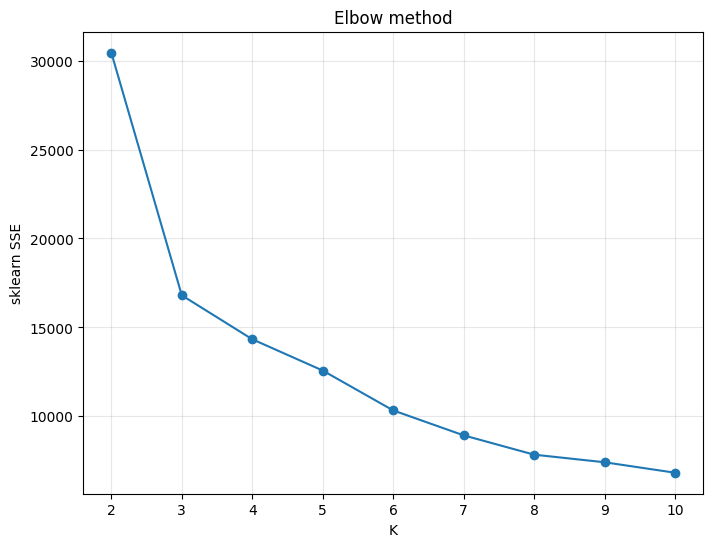

[30442.5131737833, 16804.183812138064, 14334.850044715447, 12576.168103212265, 10335.331371192671, 8933.632160230085, 7846.896240758606, 7420.208853000184, 6831.510216167602]


In [17]:
sse_values = []
for k in range(2, 11):
    sk_kmeans = KMeans(n_clusters=k, max_iter=10, random_state=17)
    sk_kmeans.fit(X)
    sse_values.append(sk_kmeans.inertia_)

plt.figure(figsize=(8, 6))
plt.plot(range(2, 11), sse_values, marker='o')
plt.title('Elbow method')
plt.xlabel('K')
plt.ylabel('sklearn SSE')
plt.grid(True, alpha=0.3)
plt.show()
print(sse_values)